# Explore and Model Data
In this notebook, I start by exploring patterns and relationship in the data, and I end by training a ridge regression model with performance and weather features to predict cyclists' moving time on the climb up Mount Diablo.

## Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import seaborn as sns

%matplotlib inline

#### Import and check out the data

In [2]:
data = pd.read_csv('/Users/bkhurley/git/diablo_velo/data/clean_data/strava_wu_data.csv')

Take a high-level look at the data

In [3]:
data.head()

,ID,Activity,Athlete,Elapsed Time,Moving Time,Start Date,Device Watts,Avg Watts,Avg Heart Rate,Max Heart Rate,...,MPH,Time Stopped,Previous Efforts,Previous Avg Moving Time,Mean Temperature,Max Temperature,Min Temperature,Precipitation,Wind Speed,Max Wind Speed
0,9131432,111986,5287,76.300000,71.833333,2006-04-23 16:06:17,False,NaN,149.5,164.0,...,7.880592,4.466667,0,NaN,58.0,64.0,53.0,0.0,8.0,16.0
1,9131428,125030,1885,93.783333,86.000000,2006-05-06 15:40:44,False,212.9,175.1,186.0,...,7.282644,7.783333,0,NaN,58.0,68.0,51.0,0.0,15.0,17.0
2,1670259583,82155037,1885,91.566667,87.583333,2006-06-09 08:50:57,False,201.6,165.7,175.0,...,7.202538,3.983333,1,86.000000,68.0,82.0,55.0,0.0,14.0,18.0
3,24297526436,991534814,3719,88.666667,88.666667,2006-07-04 09:59:01,False,182.8,NaN,NaN,...,6.503543,0.000000,0,NaN,70.0,84.0,55.0,0.0,14.0,20.0
4,1670314655,82158071,1885,85.883333,83.883333,2006-07-29 08:30:41,False,226.6,172.7,180.0,...,7.510456,2.000000,2,86.791667,69.0,79.0,60.0,0.0,11.0,18.0


In [4]:
data.describe()

,ID,Activity,Athlete,Elapsed Time,Moving Time,Avg Watts,Avg Heart Rate,Max Heart Rate,Avg Cadence,Hour,...,MPH,Time Stopped,Previous Efforts,Previous Avg Moving Time,Mean Temperature,Max Temperature,Min Temperature,Precipitation,Wind Speed,Max Wind Speed
count,2.391700e+04,2.391700e+04,2.391700e+04,23917.000000,23917.000000,22308.000000,11468.000000,11468.000000,9673.000000,23917.000000,...,23917.000000,23917.000000,23917.000000,16776.000000,23823.000000,23823.000000,23823.000000,23917.000000,23856.000000,23856.000000
mean,8.873683e+09,3.573916e+08,2.249005e+06,90.286038,84.290522,198.124951,151.777773,167.986397,69.300517,10.644939,...,7.695468,5.995516,25.334490,83.373920,64.505478,77.252823,51.304538,0.007463,7.556045,16.729837
std,7.942725e+09,3.180014e+08,3.567346e+06,23.497491,18.090041,49.932986,16.494086,16.217750,10.798626,2.884221,...,1.357216,9.723179,82.159225,16.840474,9.178340,11.717905,7.781160,0.056614,3.626928,4.424081
min,9.131105e+06,3.263000e+03,8.000000e+00,43.983333,43.983333,0.100000,1.000000,1.000000,0.000000,0.000000,...,0.535198,0.000000,0.000000,48.750000,36.000000,42.000000,25.000000,0.000000,0.000000,0.000000
25%,1.988817e+09,8.892407e+07,1.515840e+05,75.066667,73.183333,167.300000,142.700000,159.000000,63.700000,9.000000,...,6.756885,0.000000,0.000000,73.219563,59.000000,69.000000,47.000000,0.000000,5.000000,14.000000
50%,6.514766e+09,2.644652e+08,6.489680e+05,86.350000,82.483333,195.700000,153.000000,169.000000,69.600000,10.000000,...,7.605614,1.683333,2.000000,82.183333,65.000000,77.000000,53.000000,0.000000,7.000000,17.000000
75%,1.470670e+10,5.902468e+08,2.734391e+06,101.166667,92.983333,223.800000,162.400000,178.000000,75.700000,12.000000,...,8.542741,8.366667,11.000000,90.616667,71.000000,86.000000,57.000000,0.000000,10.000000,20.000000
max,2.712726e+10,1.101816e+09,2.287753e+07,1282.783333,1277.916667,668.900000,243.000000,264.000000,191.000000,23.000000,...,13.977901,153.416667,649.000000,1277.916667,91.000000,108.000000,73.000000,1.510000,20.000000,45.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23917 entries, 0 to 23916
Data columns (total 28 columns):
ID                          23917 non-null int64
Activity                    23917 non-null int64
Athlete                     23917 non-null int64
Elapsed Time                23917 non-null float64
Moving Time                 23917 non-null float64
Start Date                  23917 non-null object
Device Watts                23917 non-null bool
Avg Watts                   22308 non-null float64
Avg Heart Rate              11468 non-null float64
Max Heart Rate              11468 non-null float64
Avg Cadence                 9673 non-null float64
Date                        23917 non-null object
Time                        23917 non-null object
Day                         23917 non-null object
Hour                        23917 non-null int64
Month                       23917 non-null int64
Year                        23917 non-null int64
Distance (mi)               23917 non-null f

### Mount Diablo Ridership Trends
Let's start by exploring how ridership has evolved over time and when most cyclists ride Diablo.

#### Rides per year

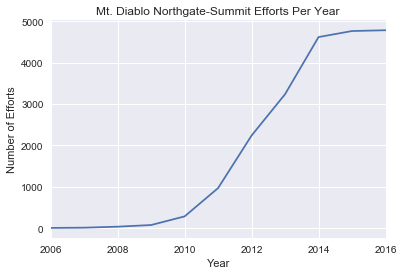

In [6]:
# remove 2017 from annual effort count because 2017 is not over
byYear = data.loc[data['Year']!=2017, :].groupby('Year').count()
byYear['ID'].plot()
plt.ylabel('Number of Efforts')
plt.title('Mt. Diablo Northgate-Summit Efforts Per Year')

The above plot suggests that ridership on diablo increased from nearly zero in 2006 to nearly 5000 in 2016. However, this is actually indicative of Strava's growth in popularity among cyclists rather than actual Diablo ridership. Mount Diablo has been a staple in the cycling community for a very long time, and I'm confident that more than a handful of rides took place in 2006.

#### Days and times of rides
What days of the week and hours during the day are most rides attempted?

In [7]:
day_hour_count = data.groupby(by=['Day', 'Hour']).count()['ID'].unstack()
day_hour_count.fillna(value=0, inplace=True)
day_hour_count.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Friday,0.0,0.0,0.0,1.0,3.0,30.0,50.0,104.0,234.0,327.0,...,177.0,137.0,66.0,75.0,25.0,0.0,2.0,0.0,1.0,0.0
Monday,0.0,0.0,0.0,1.0,3.0,19.0,30.0,78.0,186.0,251.0,...,87.0,117.0,122.0,99.0,46.0,0.0,2.0,0.0,3.0,0.0
Saturday,1.0,3.0,1.0,2.0,4.0,49.0,201.0,626.0,1344.0,1648.0,...,266.0,155.0,92.0,83.0,53.0,13.0,0.0,1.0,2.0,1.0
Sunday,3.0,0.0,3.0,3.0,2.0,34.0,184.0,484.0,935.0,1150.0,...,192.0,126.0,74.0,49.0,17.0,4.0,0.0,0.0,0.0,1.0
Thursday,1.0,0.0,0.0,0.0,2.0,14.0,48.0,55.0,143.0,321.0,...,120.0,130.0,135.0,141.0,52.0,5.0,1.0,0.0,1.0,1.0


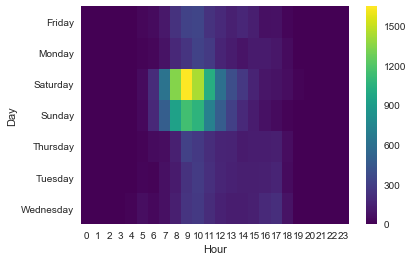

In [8]:
# plot heat map of the days and hours with most rides
fig.Figure(figsize=(5,8))
sns.heatmap(day_hour_count, cmap='viridis')

We can see that most cyclists ride Diablo's North Gate segment on the weekends, particularly in the mornings between 6 AM and noon. We can also see from the faint, light blue vertical pattern that weekday riders mostly ride in the mornings between 8 and 10 AM, and some ride in the evenings around 5 PM. Many of these cyclists are probably riding before or after work.

#### Days and months of rides
What months are most popular for riders, and does the day-of-week trend change as the months go by?

In [9]:
day_month_count = data.groupby(by=['Day', 'Month']).count()['ID'].unstack()
day_month_count.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,,,,
Friday,184,96,186,198,263,264,270,146,182,114,155,79
Monday,118,144,109,183,346,223,204,139,209,97,80,90
Saturday,369,464,604,889,1131,1451,864,569,519,405,491,242
Sunday,368,310,436,662,816,800,655,449,434,319,336,241
Thursday,163,101,197,197,209,249,252,153,131,122,136,67


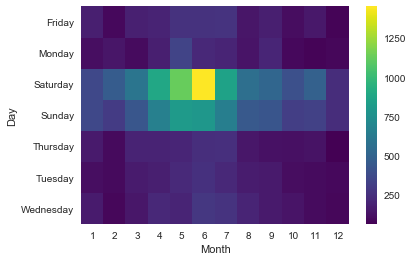

In [10]:
# plot heat map of the days and hours with most rides
fig.Figure(figsize=(5,8))
sns.heatmap(day_month_count, cmap='viridis')

Most rides are taken from late spring to early summer. This is likely because the upper elevation of Mount Diablo often dips below freezing during the winter, and Diablo's valleys can become extremely hot and dry during late summer. We also see that the pattern of weekend popularity persists throughout the year.

### Plots of Performance Data
Now let's take a look at some performance data from cyclists' efforts.

What does the distribution of moving time look like?

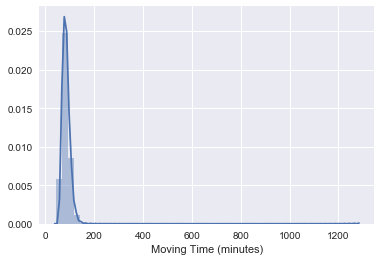

In [11]:
sns.distplot(data['Moving Time'])
plt.xlabel('Moving Time (minutes)')

The above distribution is quite skewed due to extreme outliers on the high end of moving time. I consider a moving time > 400 minutes (6.67 hours) to be abnormally long for this 10.4-mile segment. As such, I'll remove efforts that took longer than 400 minutes.

Notice below that the distribution is still somewhat skewed with outliers removed. However, this is not an issue, as my linear model will only require that residual errors be normally distributed.

In [13]:
data_outliers_removed = data.loc[data['Moving Time'] < 400, :]

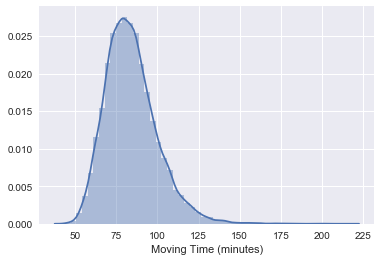

In [14]:
sns.distplot(data_outliers_removed['Moving Time'])
plt.xlabel('Moving Time (minutes)')

I'll use the Seaborn library's pairplot to get a quick look at associations among performance metrics, and then again below for the weather data. 

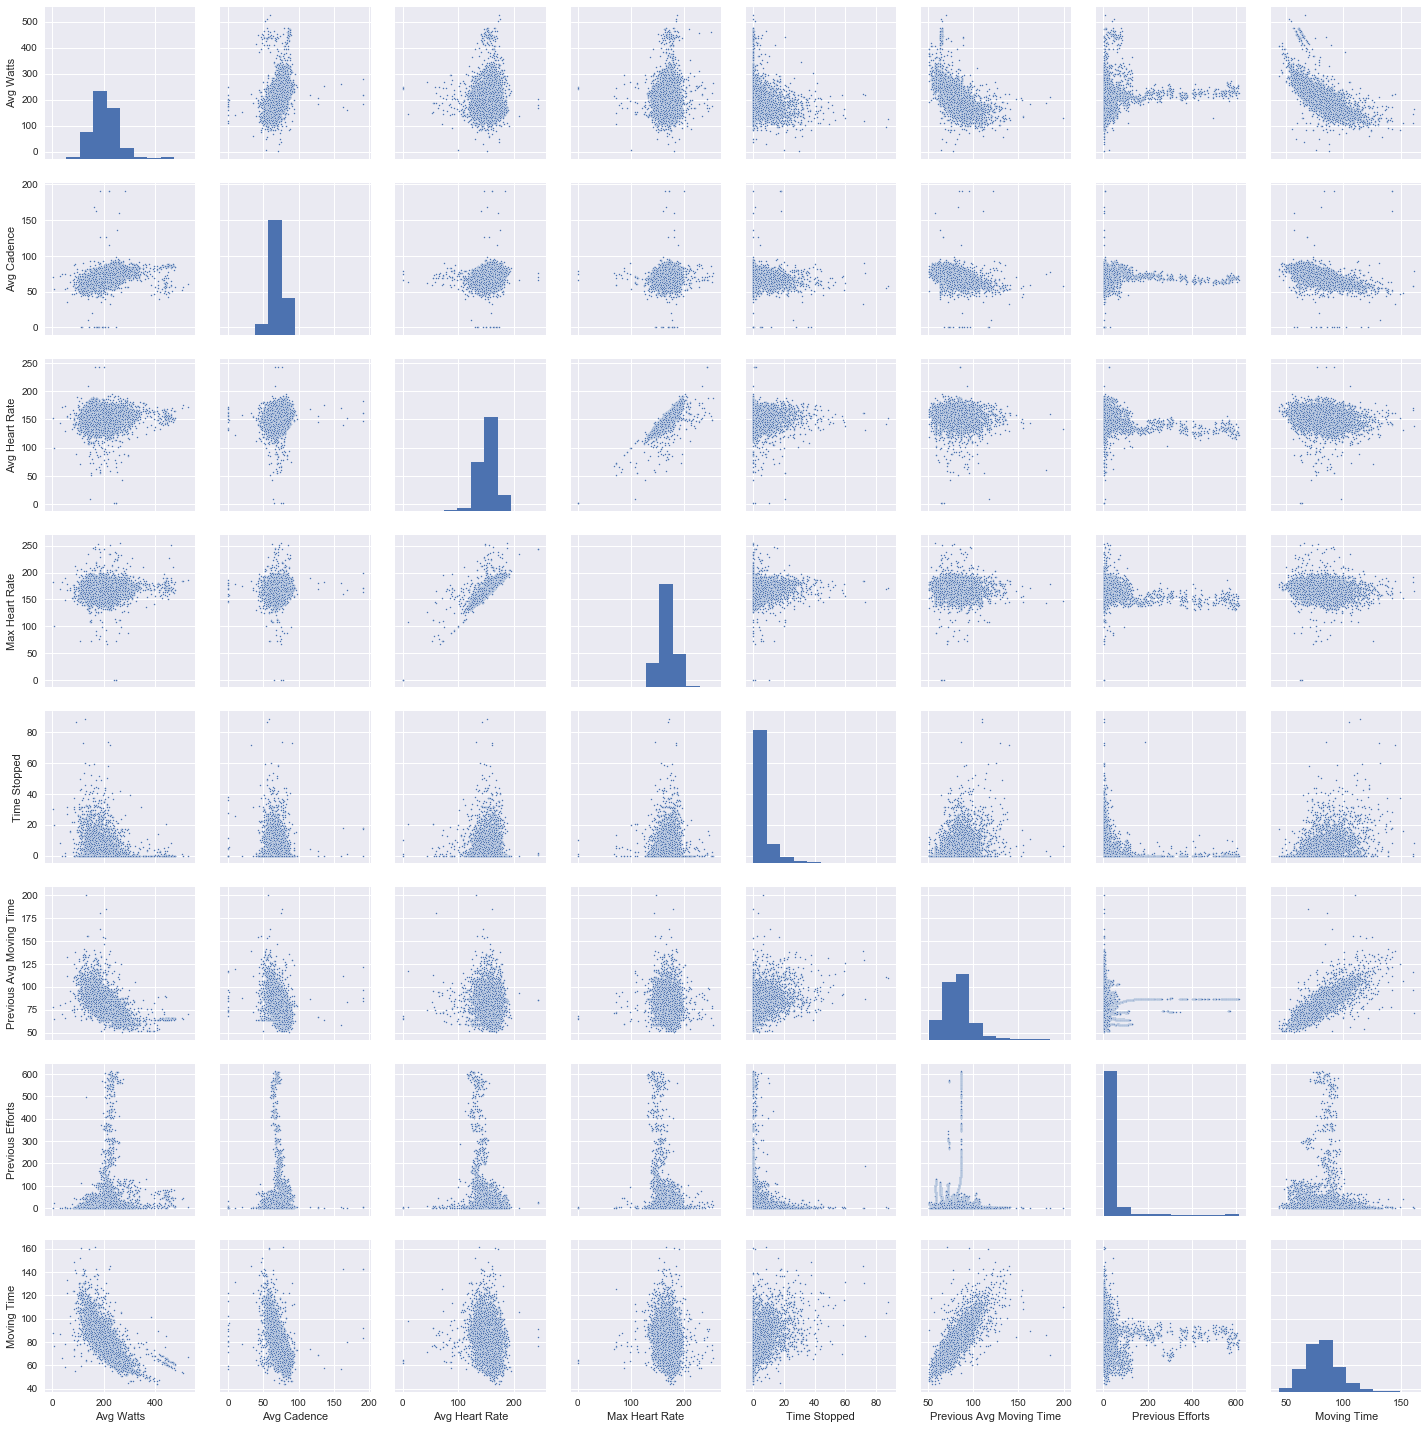

In [69]:
performance_data = data_outliers_removed[['Avg Watts', 'Avg Cadence', 'Avg Heart Rate', 
                                          'Max Heart Rate', 'Time Stopped', 
                                          'Previous Avg Moving Time', 'Previous Efforts',
                                          'Moving Time']]
# remove nan values, as pairplot does not accept them
performance_data = performance_data.loc[(~performance_data.isnull().any(axis=1)), :]
sns.pairplot(performance_data, plot_kws={"s": 3}, kind='scatter')

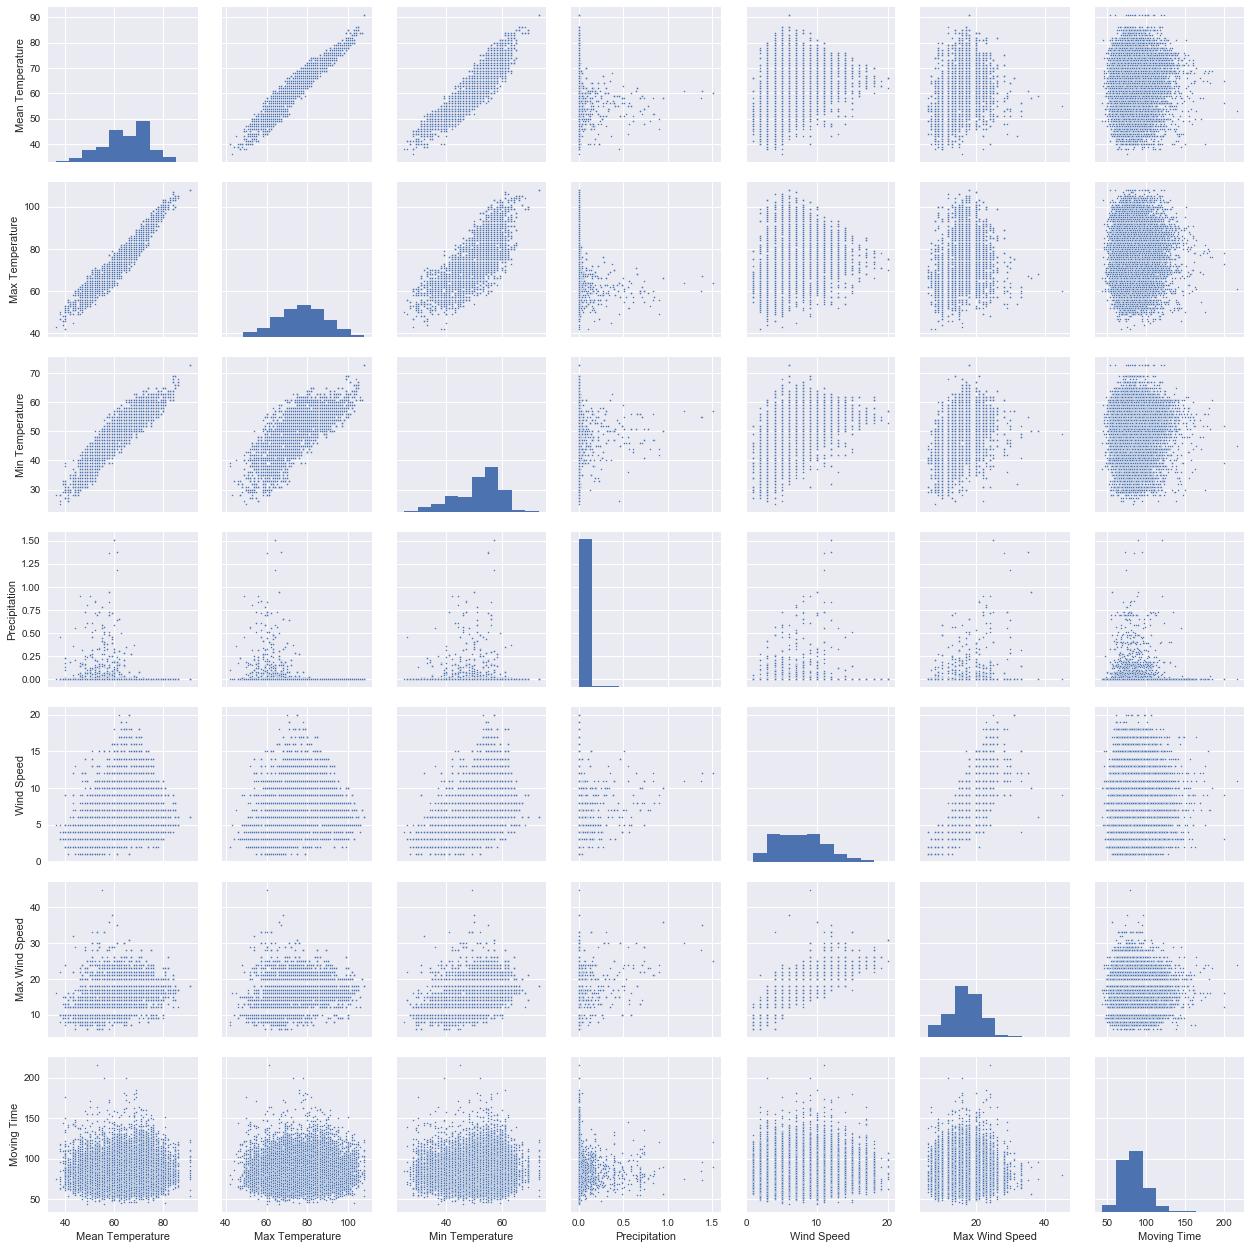

In [70]:
# plot correlations with weather-related features
weather_data = data_outliers_removed[['Mean Temperature', 'Max Temperature',
                                      'Min Temperature', 'Precipitation', 'Wind Speed',
                                      'Max Wind Speed', 'Moving Time']]
weather_data = weather_data.loc[(~weather_data.isnull().any(axis=1)), :]
sns.pairplot(weather_data, plot_kws={"s": 3})

#### Take a closer look at some correlations

##### Power

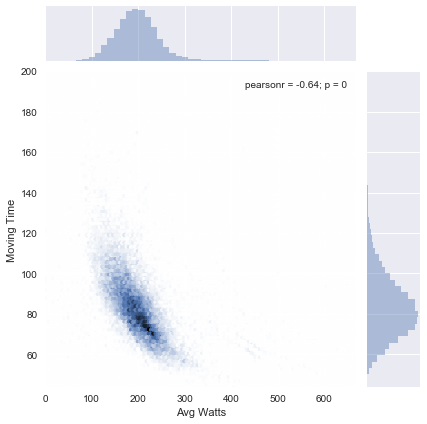

In [23]:
sns.jointplot(x='Avg Watts', y='Moving Time', 
              kind='hex', data=data_outliers_removed)

Unsurprisingly, greater average wattage is associated with shorter moving times. Cyclists that produce higher power move faster up the mountain.

##### Pedal cadence

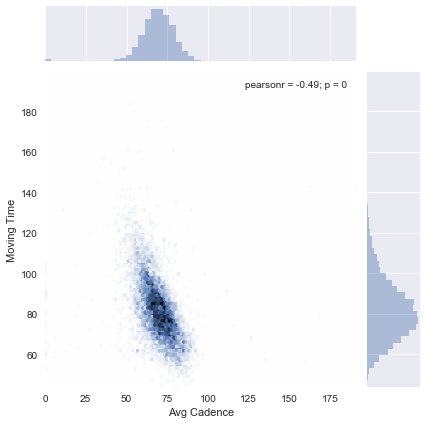

In [72]:
sns.jointplot(x='Avg Cadence', y='Moving Time',
              kind='hex', data=data_outliers_removed)

A higher average pedal cadence (pedal revolutions per minute) is also associated with faster moving times. This is likely because riders who slowly grind their pedals in a more difficult gear cannot sustain a fast climbing speed through the duration of the mountain segment.

##### Heart rate

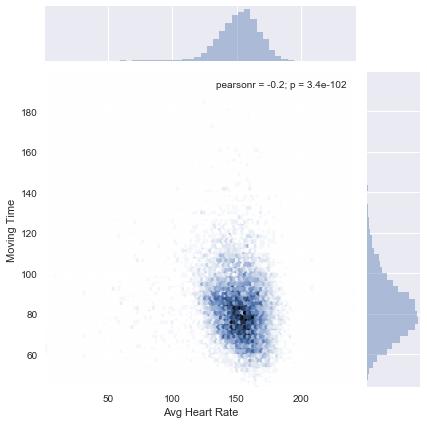

In [73]:
sns.jointplot(x='Avg Heart Rate', y='Moving Time', 
              kind='hex', data=data_outliers_removed)

This negative correlation, although somewhat weak, suggests that riders who push themselves and geerate higher heart rates tend to move up the mountain more swiftly. However, one's average heart range can fluctuate as a function of one's fitness, such that more fit athletes can perform the same effort at a lower heart rate that a less fit athlete would perform at a higher heart rate. Heart rate can also vary with caffein intake, stress, and other factors. Hence the correlation's weakness.

##### Duration of time stopped

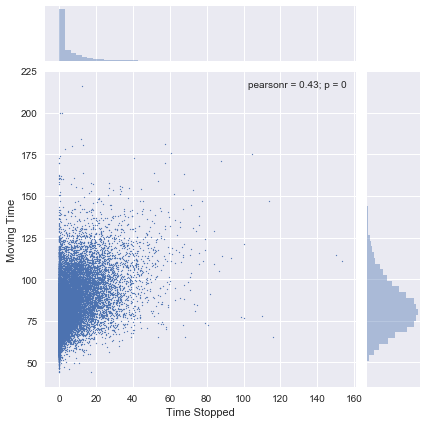

In [74]:
sns.jointplot(x='Time Stopped', y='Moving Time', s=1, 
              data=data_outliers_removed)

Riders who take longer or more frequent breaks along the route are likely to move more slowly along their effort (note that `Moving Time` does not include any time stopped).

##### Previous moving time

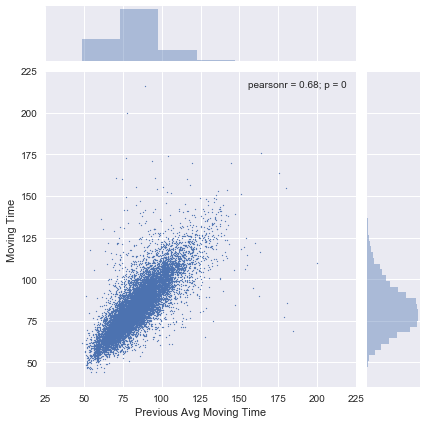

In [104]:
sns.jointplot(x='Previous Avg Moving Time', y='Moving Time', s=1, 
              data=data_outliers_removed, xlim= (25, 225))

As expected, the average moving time of a riders previous efforts on Mount Diablo highly correlates with the rider's given effort.

##### Temperature

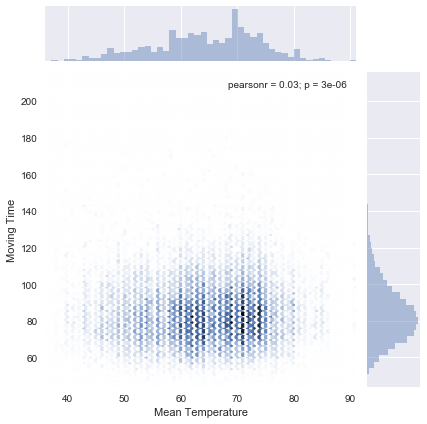

In [107]:
sns.jointplot(x='Mean Temperature', y='Moving Time', 
              kind='hex', data=data_outliers_removed)

Surprisingly, temperature has no association with a rider's moving speed. Mount Diablo gets very hot in the summer and can get quite cold in the winter, both of which can make the climb feel more difficult (speaking from personal experience). However, it could be that only experienced riders attempt the climb at the weather extremes, and those cyclists's performance are less affected by the weather.

##### Precipitation

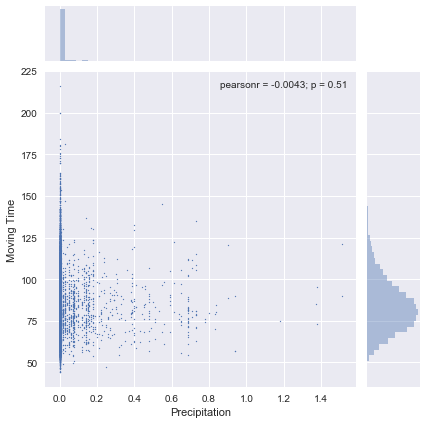

In [124]:
sns.jointplot(x='Precipitation', y='Moving Time', 
              s=1, data=data_outliers_removed)

Although no correlation exists, this suggests an interesting trend: cyclists at all skill and fitness levels climb the mountain during dry weather, but when rain is present only the more skilled and fit riders brave the slick roads. Notice that moving times lie in a much shorter range when `Precipitation` > 0.

-------
## Regression Model
Here, I train regression models to assess which performance and weather features are associated with moving time and how well we can use these features to predict the `Moving Time` of a given effort. I will start with a simple linear regression and then refine the analysis with a ridge regression.

In [81]:
# libraries for building/evaluating the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn import metrics

## Least-squares regression
Let's first use a simple *ordinary least-squares (OLS) regression* model to assess associations between select features and moving time. 

### Partition data for validation
I partition 80% of efforts into a training set and the remaining 20% into a test set. After training the model on the training data, I validate the model's predictions against the testing set. 

In [64]:
model_data = data_outliers_removed[['Avg Watts', 'Avg Cadence', 'Avg Heart Rate', 
                                    'Time Stopped', 'Previous Avg Moving Time',
                                    'Mean Temperature', 'Precipitation', 'Wind Speed', 
                                    'Moving Time']]
# remove NaN from data before training
model_data = model_data.loc[(~model_data.isnull().any(axis=1)), :]

In [65]:
X = model_data[['Avg Watts', 'Avg Cadence', 'Avg Heart Rate', 'Time Stopped', 
          'Previous Avg Moving Time','Mean Temperature', 'Precipitation', 
          'Wind Speed']]
y = model_data['Moving Time']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train model
Fit an OLS regression model to the training data

In [205]:
lm = LinearRegression()
lm.fit(X_train,y_train,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [206]:
print(lm.coef_)

[-0.07256208 -0.23513528 -0.09192849  0.15209989  0.58566949 -0.00872357
  2.33161578 -0.00403046]


### Evaluate model predictions against test data
How well does the OLS regression predict `Moving Time` observations that the model has not yet seen?

In [207]:
predictions = lm.predict(X_test)

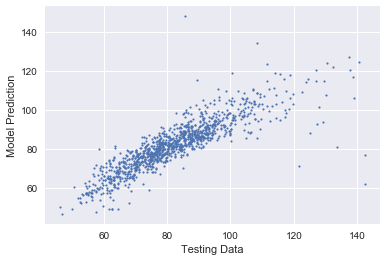

In [208]:
plt.scatter(y_test, predictions, s=3)
plt.xlabel('Testing Data')
plt.ylabel('Model Prediction')

OLS-predicted `Moving Time` is for the most part nicely correlated with `Moving Time` observations from the test set.

### Evaluate model

In [209]:
print('RSS: ', sum((y_test - predictions)**2))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2: ', metrics.r2_score(y_test, predictions))

RSS:  68858.0925287
MAE: 5.17135880371
MSE: 61.8671091902
RMSE: 7.86556477249
R^2:  0.737497008479


Not bad. Our simple regression model explains 73.7% of `Moving Time` variance.

#### Residuals

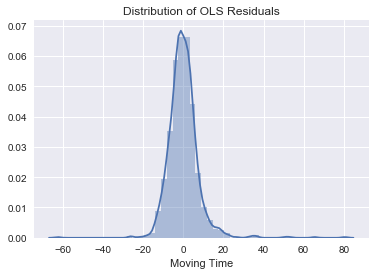

In [222]:
sns.distplot((y_test-predictions),bins=50);
plt.title('Distribution of OLS Residuals')

Residual error is distributed normally about 0, as we like to see.

In [211]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['OLS Coefficient'])
coeff_df

,OLS Coefficient
Avg Watts,-0.072562
Avg Cadence,-0.235135
Avg Heart Rate,-0.091928
Time Stopped,0.152100
Previous Avg Moving Time,0.585669
Mean Temperature,-0.008724
Precipitation,2.331616
Wind Speed,-0.004030


## Ridge Regression
Sometimes least-squares regression models can over-fit training data, leading to unnecessary variance when predicting test data. Let's see if we can improve model performance by instead using *ridge regression*. 

Ridge regression employs regularization, which shrinks coefficient estimates towards zero. A tuning parameter (`alpha` in `sklearn`) controls the extent of regularization. I'll select the tuning parameter using 10-fold cross-validation and testing the cross-validation error for many values of `alpha`. Conveniently, `RidgeCV` within `sklearn` handles CV testing for us with just a few parameter specifications.

### Train model
Fit ridge model under each tuning value, and select best penalty (`alpha`) using cross-validation.  

In [268]:
# define array of tuning values to test
tuning = np.logspace(0, 7, num=15)
# fit ridge model to data using 10-fold CV
ridge = RidgeCV(alphas=tuning, cv=10)
ridge.fit(X, y)

RidgeCV(alphas=array([  1.00000e+00,   3.16228e+00,   1.00000e+01,   3.16228e+01,
         1.00000e+02,   3.16228e+02,   1.00000e+03,   3.16228e+03,
         1.00000e+04,   3.16228e+04,   1.00000e+05,   3.16228e+05,
         1.00000e+06,   3.16228e+06,   1.00000e+07]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [280]:
print('Tuning parameter alpha: ', ridge.alpha_)

Tuning parameter alpha:  316.227766017


Looks like an alpha of 316 gives the best trade-off between bias and variance.

### Evaluate model predictions
Did the ridge regression model give us any extra predictive precision?

In [270]:
ridge_predictions = ridge.predict(X)

In [281]:
print('MSE:', metrics.mean_squared_error(y, ridge_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, ridge_predictions)))
print('R^2: ', ridge.score(X, y))

MSE: 54.8749013627
RMSE: 7.40775953732
R^2:  0.750349994311


MSE and RMSE are slightly lower (indicating better fit). Furthermore, whereas the OLS model explained 73.7% of variance, the ridge regression model explains around 75% of variance.

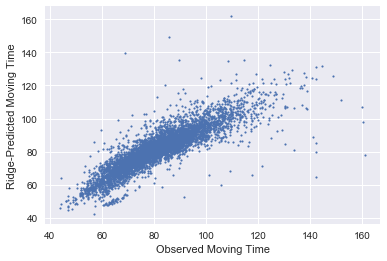

In [282]:
plt.scatter(y, ridge_predictions, s=3)
plt.xlabel('Observed Moving Time')
plt.ylabel('Ridge-Predicted Moving Time')

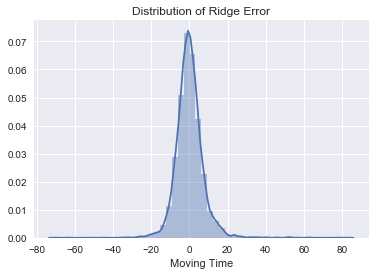

In [283]:
sns.distplot((y-ridge_predictions),bins=50)
plt.title('Distribution of Ridge Error')

Model predictions are well correlated with observed `Moving Time` and residual error from the ridge model is narrowly and normally distributed around 0.

### Ridge coefficients

In [276]:
ridge_coeff_df = pd.DataFrame(ridge.coef_,X.columns,columns=['Ridge Coefficient'])
ridge_coeff_df

,Ridge Coefficient
Avg Watts,-0.074591
Avg Cadence,-0.213456
Avg Heart Rate,-0.092809
Time Stopped,0.144316
Previous Avg Moving Time,0.592148
Mean Temperature,-0.010310
Precipitation,0.113970
Wind Speed,-0.012841


#### Interpretation of coefficients
- Greater `Avg Watts` predicts a faster moving time, such that a cyclist averaging 250 watts will finish 7.5 minutes faster than one averaging 150 watts. This is to be expected; the more power produced, the faster one moves. However, raw watts are not a perfect metric, as a heavier rider will need to produce greater power to move at the same speed as a lighter rider. Watts/kg is more reliable in this regard, but cyclist weight was not readily obtainable from the segment effort data set.

- A higher pedaling cadence predicts a faster moving time. We can see from the ridge coefficients above that, all else being equal, someone averaging a 90 RPM cadence is likely to finish the segement around 6.5 minutes faster than one averaging 60 RPM. This supports the advice the advice of many seasoned cyclists and coaches: spin at a higher cadence on climbs rather than grinding in slow gears so as not to over-fatigue leg muscles early in the segment.

- Not surpringly, cyclists who continuously push hard within a segement finish faster, as evident by the `Avg Heart Rate` coefficient. A rider who averages 180 BPM is likely to finish around 2.8 minutes faster than one who keeps their heart rate lower at 150 BPM. However, we must treat this as a loose metric, as one's maximum heart rate can differ based solely on physical fitness.

- Athletes who spend more time taking breaks tend to ride at a slower speed up the mountain. For instance, one who stops for a total of 30 minutes along the way is likely to have a moving time (that does not include stops) 4.3 minutes slower than one who takes no breaks. This likely reflects that riders who are in better shape, and thus faster, do not need to take as many breaks as less conditioned riders.

- As one might expect, the average moving time from a cyclist's previous efforts strongly predicts how fast they will move on the current effort.

- Weather factors such as `Mean Temperature`, `Precipitation`, and `Wind Speed` have no measurable effect on cyclists' moving time. I found this surprising, as Diablo gets quite hot in the summer, and I have certainly felt more challenged when I have ridden Diablo on hot days. However, rather than slowing everyone down, it could be that inclement, extreme weather filters out the less serious, slower riders, leaving the faster, more experienced riders on those days.

## Conclusion

Using data mined from Strava, I found several performance features that contribute to cyclists moving time on the climb up Mount Diablo's north side. Using these features to train a ridge regression model, I was able to predict cyclists' moving time, accounting for around 75% of variance in the data. Moreover, this analysis could be easily replicated for any segment on Strava.

Beyond my own curiosity as a recreational cyclist that has ridden this segement many times, an analysis such as the one done here could be quite useful to professional cyclists. Some of the features I examined predict ride duration differences on the order of several minutes. That may not sound like much, but in a sport where great efforts are made to reap marginal gains, a four minute difference in segment completion time is like night and day.

Furthermore, the modern amateur cyclist is notoriousy data-hungry, and the typical Strava user is notoriously PR-hungry (PR = personal record). As most cyclists today ride with a GPS computer that gives them real-time metrics on power, cadence, heart rate, etc., anyone wishing to PR on a segment could use the result of an analysis like this to optimize their performance.